## EarthML TensorFlow Exercise Notebook 1: Linear Regression Workflow


Please submit this notebook after completion. You are encouraged to further experiment by yourself. Instructions in this notebook are just to guide you further on your learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

2024-09-16 23:45:52.134127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

### Exercise 1: Linear Regression

1.1. Generate a dataset with 100 data points for linear regression using the equation ($
y = x^3 - 5x^2 + 4x - 7 $ ) , where `x` is a random number between 1 and 10 (This is an arbitrary choice).

Add some Gaussian noise to the output.

1.2. Split the dataset into training and testing sets (80% train and 20% test).

1.3. Implement a linear regression model in TensorFlow to predict `y` based on `x`.

1.4. Train your model and visualize the loss reduction.

1.5. Test your model on the test set and visualize the predicted line against the real data.

---

In [2]:
# set a seed
np.random.seed(0)
# generate a dataset with 100 numbers between 1 and 10
x = np.random.uniform(1, 10, 100)
# cause seed is set "0", it generates the same random set of numbers

In [3]:
# generate y values
y_raw = x**3 - 5*x**2 + 4*x - 7

In [4]:
# add gaussian noise to the output
noise = np.random.normal(0, 10, 100)
y = y_raw + noise

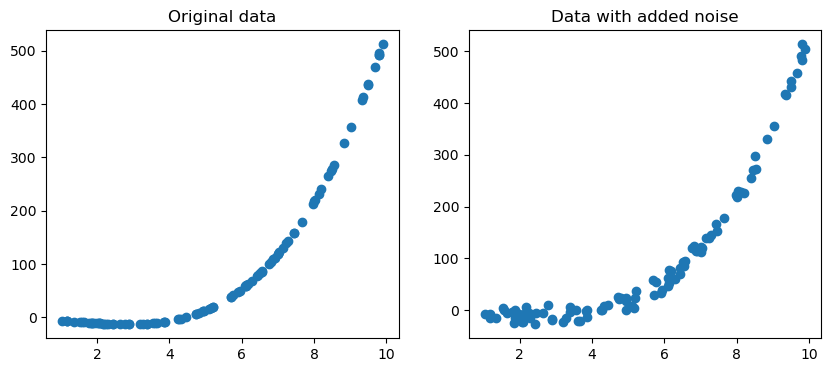

In [5]:
# plot of the original data and same data with added noise
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(x, y_raw)
plt.title("Original data")

plt.subplot(1, 2, 2)
plt.scatter(x, y)
plt.title("Data with added noise")

plt.show()

In [6]:
# split the data set
# first 80 data into train, the rest 20 data into test
x_train, x_test = x[:80], x[80:]
y_train, y_test = y[:80], y[80:]
# check the ratio
print("train data length : " + str(len(x_train)))
print("test data length  : " + str(len(x_test)))

train data length : 80
test data length  : 20


In [7]:
# build the sequential model
model = keras.Sequential([
    keras.layers.Input(shape=(1,), name="input_layer"),
    keras.layers.Dense(units=1, name="output_layer")
])

model.compile(optimizer="adam", loss="mean_squared_error")

2024-09-16 23:45:57.240526: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


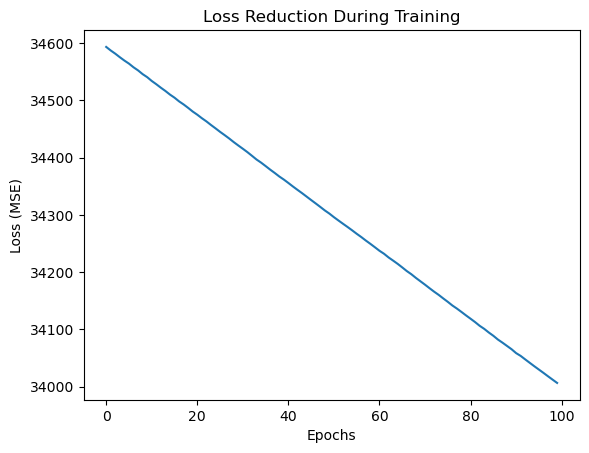

In [8]:
# use model to execute the training for 100 epochs
history = model.fit(x_train, y_train, epochs=100, verbose=0)

# plot loss during training (mean squared error)
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Reduction During Training")
plt.show()

In [9]:
# by looking at the graph, the following comment can be made:
# the increase in the number of epochs affected the loss very little.

1/1 [==============================] - 0s 100ms/step


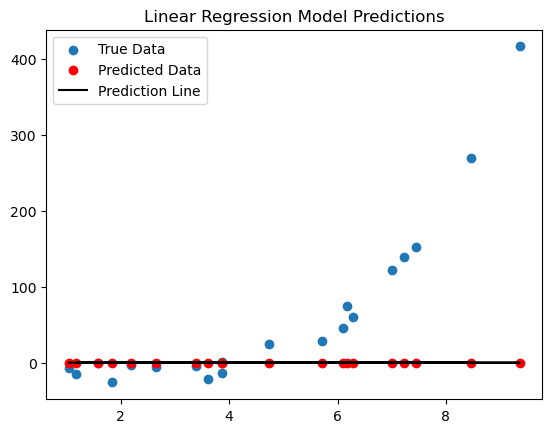

In [10]:
# predict y values with help of model
y_pred = model.predict(x_test)

# plot true data, predicted data and prediction line
plt.scatter(x_test, y_test, label="True Data")
plt.scatter(x_test, y_pred, label="Predicted Data", color="red")
plt.plot(x_test, y_pred, label="Prediction Line", color="black")
plt.legend()
plt.title("Linear Regression Model Predictions")
plt.show()

---
### Exercise 2: Overfitting and Underfitting

2.1. Generate a dataset with a quadratic relationship, for instance \(y = x^2 + 2x + 3\). Add Gaussian noise to the output.

2.2. Split the dataset into training and testing sets.

2.3. Train a simple linear model on the dataset and visualize the predictions.

2.4. Now, implement a polynomial regression model of degree 2 and train it on the dataset.

2.5. Compare the performance of the linear model and the polynomial model. Which one underfits? Which one is just right?

2.6. Now, try a polynomial regression of degree 10. What do you observe regarding overfitting?

---

In [11]:
# set a seed
np.random.seed(0)
# generate a dataset with 100 numbers between 1 and 10
x = np.random.uniform(-10, 10, 100)
# cause seed is set "0", it generates the same random set of numbers

In [12]:
# generate y values
y_raw = x**2 + 2*x + 3
# add gaussian noise to the output
noise = np.random.normal(0, 15, 100)
y = y_raw + noise

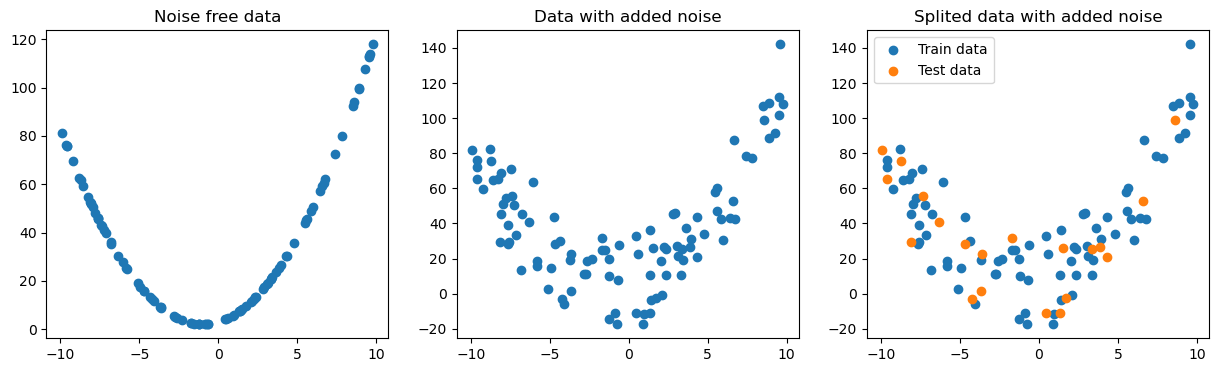

In [13]:
# plot of the original data and same data with added noise
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(x, y_raw)
plt.title("Noise free data")

plt.subplot(1, 3, 2)
plt.scatter(x, y)
plt.title("Data with added noise")

# split the data set
# first 80 data into train, the rest 20 data into test (same ratio with exercise 1)
x_train, x_test = x[:80], x[80:]
y_train, y_test = y[:80], y[80:]

plt.subplot(1, 3, 3)
plt.scatter(x_train, y_train, label="Train data")
plt.scatter(x_test, y_test, label="Test data")
plt.title("Splited data with added noise")
plt.legend()
plt.show()

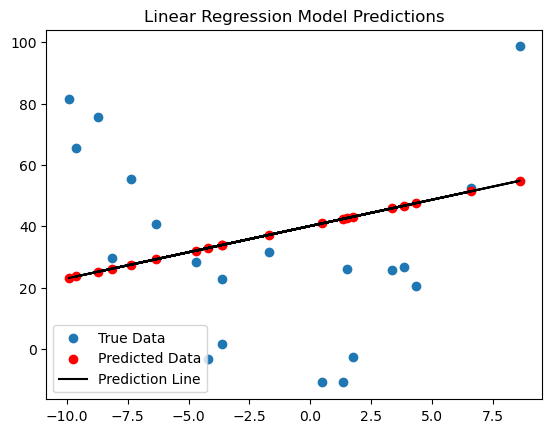

In [14]:
# create a linear regression object
linear_model = LinearRegression()

# train the model using the train data
linear_model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

# make predictions using the test data
y_linear_pred = linear_model.predict(x_test.reshape(-1, 1))

# plot true data, predicted data and prediction line
plt.scatter(x_test, y_test, label="True Data")
plt.scatter(x_test, y_linear_pred, label="Predicted Data", color="red")
plt.plot(x_test, y_linear_pred, label="Prediction Line", color="black")
plt.legend()
plt.title("Linear Regression Model Predictions")
plt.show()

# calculate the MSE
mse_linear = mean_squared_error(y_test, y_linear_pred.reshape(1, -1)[0])

In [15]:
# prediction is pretty bad, linear model is not enough

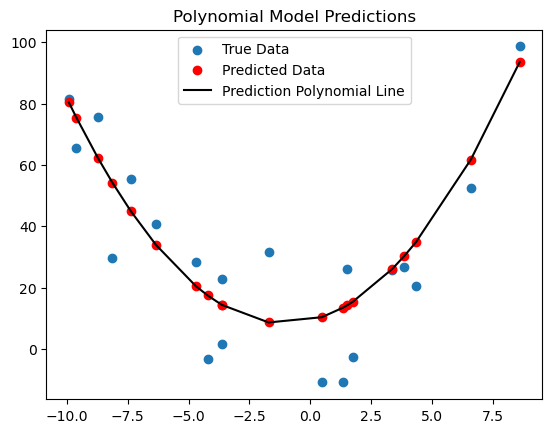

In [17]:
# create a second degree polynomial object and fit x_train data
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))

# create a model and train the model
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# fit x_test data and predict y values
x_test_poly_unsorted = poly_features.transform(x_test.reshape(-1, 1))
y_poly_pred_unsorted = poly_model.predict(x_test_poly_unsorted)

# fit sorted x_test data and predict y values
# sort x_test data because I want to plot a polynomial
x_test_poly_sorted = np.sort(x_test)
x_test_poly = poly_features.transform(x_test_poly_sorted.reshape(-1, 1))
y_poly_pred = poly_model.predict(x_test_poly)

# plot true data, predicted data and prediction line
plt.scatter(x_test, y_test, label="True Data")
plt.scatter(x_test_poly_sorted, y_poly_pred, label="Predicted Data", color="red")
plt.plot(x_test_poly_sorted, y_poly_pred, label="Prediction Polynomial Line", color="black")
plt.legend()
plt.title("Polynomial Model Predictions")
plt.show()

# calculate the MSE
mse_poly = mean_squared_error(y_test, y_poly_pred_unsorted)

In [18]:
# compare mse values
print("Mean squared error for linear model     : " + str(mse_linear))
print("Mean squared error for polynomial model : " + str(mse_poly))

Mean squared error for linear model     : 1125.7719986944624
Mean squared error for polynomial model : 205.97844475838912


- When we look at the MSE values, the difference between the two models is clearly evident. While MSE in the linear model is quite high, MSE in the polynomial model is much less. This difference explains to us that **the linear model is underfit.**
- Also, if we examine the prediction graphs in both models, we can see that the prediction line in the linear model does not fit. In the polynomial model, the prediction line fits better. **Polynomial model is just right.**

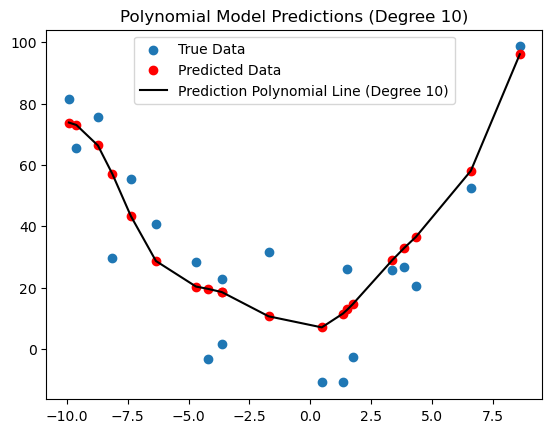

In [19]:
# create a tenth degree polynomial object and fit x_train data
tenth_features = PolynomialFeatures(degree=10)
x_train_tenth = tenth_features.fit_transform(x_train.reshape(-1, 1))

# create a model and train the model
tenth_model = LinearRegression()
tenth_model.fit(x_train_tenth, y_train)

# fit x_test data and predict y values
x_test_tenth_unsorted = tenth_features.transform(x_test.reshape(-1, 1))
y_tenth_pred_unsorted = tenth_model.predict(x_test_tenth_unsorted)

# fit sorted x_test data and predict y values
# sort x_test data because I want to plot a polynomial
x_test_tenth_sorted = np.sort(x_test)
x_test_tenth = tenth_features.transform(x_test_tenth_sorted.reshape(-1, 1))
y_tenth_pred = tenth_model.predict(x_test_tenth)

# plot true data, predicted data and prediction line
plt.scatter(x_test, y_test, label="True Data")
plt.scatter(x_test_tenth_sorted, y_tenth_pred, label="Predicted Data", color="red")
plt.plot(x_test_tenth_sorted, y_tenth_pred, label="Prediction Polynomial Line (Degree 10)", color="black")
plt.legend()
plt.title("Polynomial Model Predictions (Degree 10)")
plt.show()

# calculate the MSE
mse_10degree = mean_squared_error(y_test, y_tenth_pred_unsorted)

In [20]:
print("Mean squared error for 10th degree model : " + str(mse_10degree))

Mean squared error for 10th degree model : 210.44998522572527


- Using 10th order regression for this equation will **cause overfit**. It loses its generalization feature because it focuses **too** much on the train data. When it predicts for unseen data (test data), the MSE value is higher than the second degree regression.
- **The model may perform very well on the training data but generalize poorly to new data. Overfitting occurs when the model becomes too complex (10 degree) for the given dataset.**

---
### Exercise 3: Regularization

3.1. Continuing from the previous exercise, add L2 regularization to the polynomial regression model of degree 10.

3.2. Train the model and compare its performance with the unregularized degree 10 model. What do you observe?

3.3. Experiment with different regularization strengths. How does the strength of regularization affect the model?

---

In [32]:
poly_features_deg10 = PolynomialFeatures(degree=10)
x_train_poly_deg10 = poly_features_deg10.fit_transform(x_train.reshape(-1, 1))
x_test_poly_deg10 = poly_features_deg10.transform(x_test.reshape(-1, 1))

In [33]:
# L2 regularization factor: 0.001
model = keras.Sequential([
    keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.001), input_shape=(11,))
])

model.compile(optimizer="adam", loss="mean_squared_error")

In [34]:
history = model.fit(x_train_poly_deg10, y_train, epochs=1000, verbose=0)

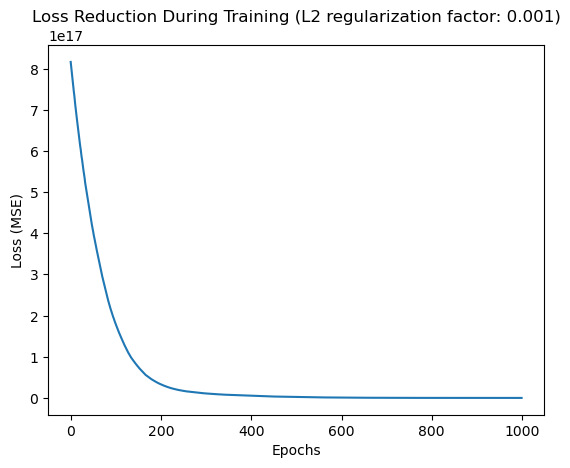

In [35]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Reduction During Training (L2 regularization factor: 0.001)")
plt.show()

In [36]:
# L2 regularization factor: 0.01
model = keras.Sequential([
    keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.01), input_shape=(11,))
])

model.compile(optimizer="adam", loss="mean_squared_error")

In [37]:
history = model.fit(x_train_poly_deg10, y_train, epochs=1000, verbose=0)

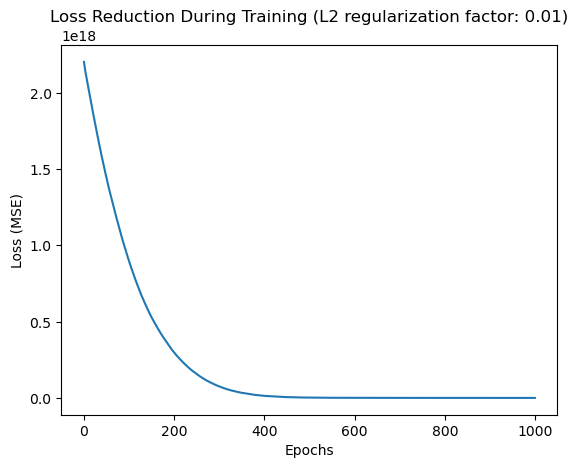

In [38]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Reduction During Training (L2 regularization factor: 0.01)")
plt.show()

In [39]:
# L2 regularization factor: 0.1
model = keras.Sequential([
    keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.1), input_shape=(11,))
])

model.compile(optimizer="adam", loss="mean_squared_error")

In [40]:
history = model.fit(x_train_poly_deg10, y_train, epochs=1000, verbose=0)

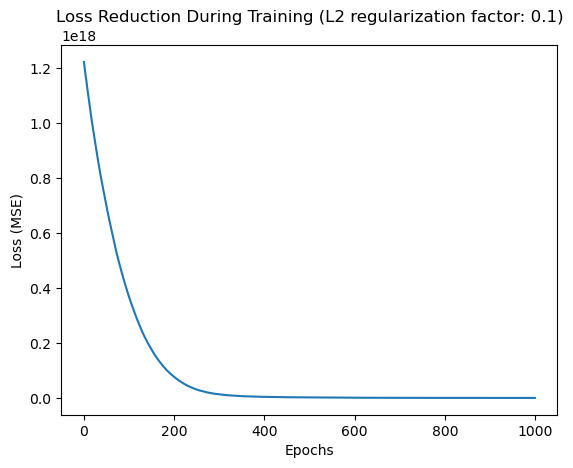

In [41]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Reduction During Training (L2 regularization factor: 0.1)")
plt.show()

In [42]:
# L2 regularization factor: 1.
model = keras.Sequential([
    keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(1.0), input_shape=(11,))
])

model.compile(optimizer="adam", loss="mean_squared_error")

In [43]:
history = model.fit(x_train_poly_deg10, y_train, epochs=1000, verbose=0)

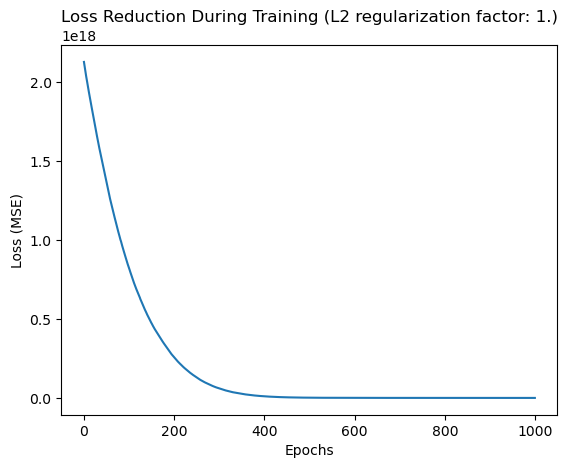

In [44]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Reduction During Training (L2 regularization factor: 1.)")
plt.show()

- **Note:** I followed the instructions but I had a problem with the interpretation part. I did not understand what the results meant. I'll need to get feedback on that.

---
### Exercise 4: Activation and Cost Functions

4.1. Define and visualize the following activation functions: Sigmoid, ReLU, and Tanh. Describe their main properties and potential use cases.

4.2. Implement a simple feed-forward neural network in TensorFlow for a binary classification problem. Use the sigmoid activation function for the output layer.

4.3. Generate a toy binary classification dataset and train your neural network on it.

4.4. Replace the sigmoid activation function in the hidden layers with ReLU and compare the performances. Which one trains faster?

4.5. Experiment with different cost functions such as Mean Squared Error (MSE) and Cross-Entropy. What are their differences and which one is more suitable for the given problem?

---

- Activation functions introduce non-linearity to neural networks. Since linearity is very simple, activation functions are used to model complex relationships. Here are more info about Sigmoid, ReLU, and Tanh:

- Regression: Linear Activation Function
- Binary Classification: Sigmoid
- Multilabel Classification: Sigmoid
- Convolutional Neural Network (CNN): ReLU activation function.
- Recurrent Neural Network: Tanh and/or Sigmoid activation function.



In [45]:
# set a dataset for visualization
x = np.linspace(-6, 6, 200)

#### Sigmoid Function

In [46]:
# it is a smooth function
# range is from 0 to 1
# the output of large values is 1
# the output of small values is 0
# it is for the classification problems
def sigmoid(x):
  # formula of sigmoid function:
  return 1 / ( 1 + np.exp(-x))

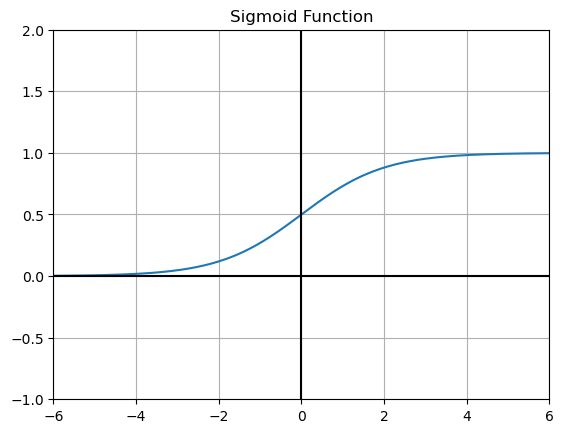

In [47]:
# visualization of the sigmoid function
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Function")
plt.grid()
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(-6, 6)
plt.ylim(-1, 2)
plt.show()

#### ReLU Function

In [48]:
# it is simple and efficient function
# range is from 0 to x
# the output of positive values is the value itself
# the output of negative values is 0
# it is the most commonly used activation function for hidden layers
def relu(x):
  # formula of relu function:
  return np.maximum(0, x)

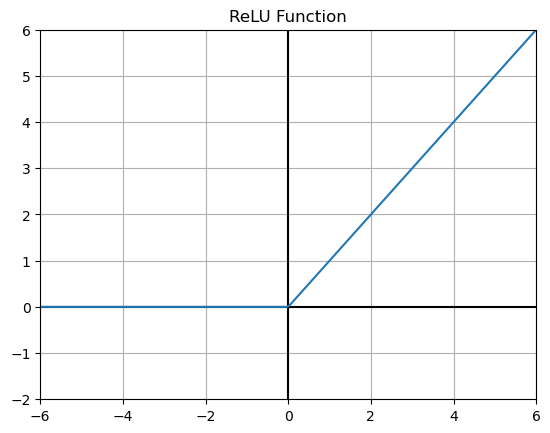

In [49]:
# visualization of the relu function
plt.title("ReLU Function")
plt.grid()
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, relu(x))
plt.xlim(-6, 6)
plt.ylim(-2, 6)
plt.show()

#### Tanh Function

In [50]:
# it is a smooth function
# zero-centered
# range is from -1 to 1
# the output of large values is 1
# the output of small values is -1
def tanh(x):
  # formula of tanh function:
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

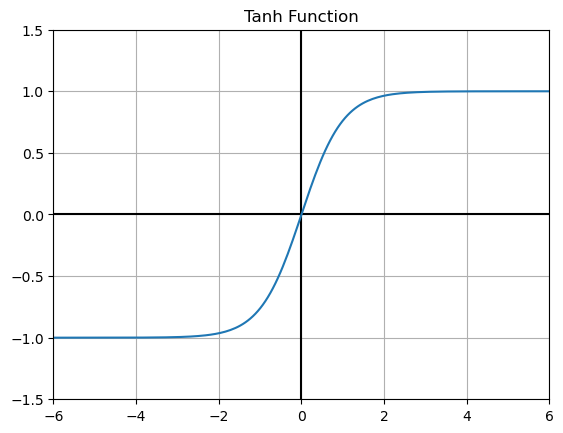

In [51]:
# visualization of the tanh function
plt.title("Tanh Function")
plt.grid()
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, tanh(x))
plt.xlim(-6, 6)
plt.ylim(-1.5, 1.5)
plt.show()

#### Rest of Exercise

In [52]:
# generate a toy binary classification dataset
x, y = make_classification(n_samples=1000, n_features=8, random_state=0)

# split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [53]:
# model 1 has a hidden layer with sigmoid function
model_1 = keras.Sequential([
    keras.layers.Dense(units=64, activation="relu", input_dim=8),
    keras.layers.Dense(units=32, activation="sigmoid"),
    keras.layers.Dense(units=1, activation="sigmoid")
])

model_1.compile(optimizer="adam", loss="mean_squared_error")

In [54]:
%%time
history_1 = model_1.fit(x_train, y_train, epochs=10000, verbose=0)

KeyboardInterrupt: 

In [ ]:
# model 2 has a hidden layer with relu function
model_2 = keras.Sequential([
    keras.layers.Dense(units=64, activation="relu", input_dim=8),
    keras.layers.Dense(units=32, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid")
])

model_2.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
%%time
history_2 = model_2.fit(x_train, y_train, epochs=10000, verbose=0)

CPU times: user 4min 5s, sys: 15.6 s, total: 4min 20s
Wall time: 4min 22s


- **Note:** At first, I tried with the epoch value of 100. I decided to increase the epoch value when the time difference was very small. I still couldn't notice any significant difference.

In [ ]:
model_3 = keras.Sequential([
    keras.layers.Dense(units=64, activation="relu", input_dim=8),
    keras.layers.Dense(units=32, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid")
])

model_3.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
history_3 = model_3.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
model_4 = keras.Sequential([
    keras.layers.Dense(units=64, activation="relu", input_dim=8),
    keras.layers.Dense(units=32, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid")
])

model_4.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
history_4 = model_4.fit(x_train, y_train, epochs=100, verbose=0)

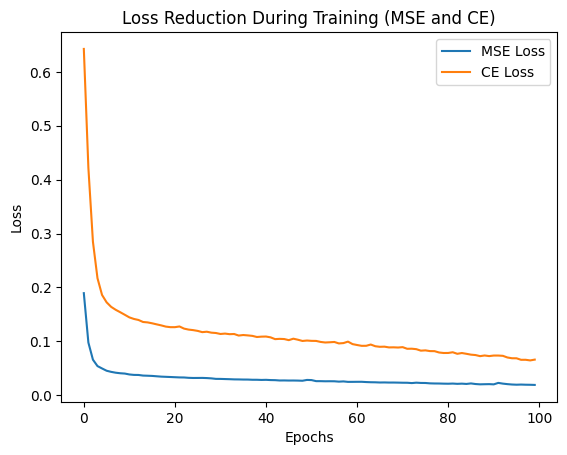

In [ ]:
# plot loss during training (mean squared error)
plt.plot(history_3.history["loss"], label="MSE Loss")
plt.plot(history_4.history["loss"], label="CE Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Reduction During Training (MSE and CE)")
plt.show()

- **Note:** I followed the instructions but I had a problem with the interpretation part. I did not understand what the results meant. I'll need to get feedback on that. But I know Cross-Entropy is more suitable for the given problem.

In [40]:
x_test_tenth_unsorted.shape

(20, 11)